In [438]:
import numpy as np
from matplotlib import pyplot as plt
from jitcdde import jitcdde, y, t
from symengine import exp
import seaborn as sns
import pandas as pd
from scipy import fft

COLORS = {"S": "#2f4b7c",
          "E": "#ffa600",
          "I": "#f95d6a",
          "R": "#a05195",
          "D": "#003f5c",
          "C": "#ff7c43",
          "X": "#665191",
          "Y": "#d45087"}

In [439]:
beta = 1.5
gamma = 1/14
mu = 0.0002
tau = 180
nu = 1/(100000 * 365)

In [440]:
f = [
    mu - beta * y(0, t) * y(1, t) - (nu + mu) * y(0, t) + nu * y(0, t - tau),
    beta * y(0, t) * y(1, t) - (gamma + mu) * y(1, t),
    nu * (y(0, t) - y(0, t-tau)) - mu * y(2, t),
    gamma * y(1, t) - mu * y(3, t)
]

In [441]:
DDE = jitcdde(f, n=4, delays=[tau])

In [442]:
DDE.constant_past([0.9, 0.1, 0, 0], time=tau)

In [443]:
DDE.step_on_discontinuities()

Generating, compiling, and loading C code.
Using default integration parameters.


In [444]:
res = []

for time in np.arange(DDE.t, DDE.t + 30000, 1):
    res.append(DDE.integrate(time))

/opt/python/envs/default/lib/python3.8/site-packages/jitcdde/_jitcdde.py:792: UserWarning: The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.
  warn("The target time is smaller than the current time. No integration step will happen. The returned state will be extrapolated from the interpolating Hermite polynomial for the last integration step. You may see this because you try to integrate backwards in time, in which case you did something wrong. You may see this just because your sampling step is small, in which case there is no need to worry.")


In [445]:
np.vstack(res)[3:,:]

<ipython-input-446-2f786681055e>:8: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=True, which='major', c='w', lw=2, ls='-')


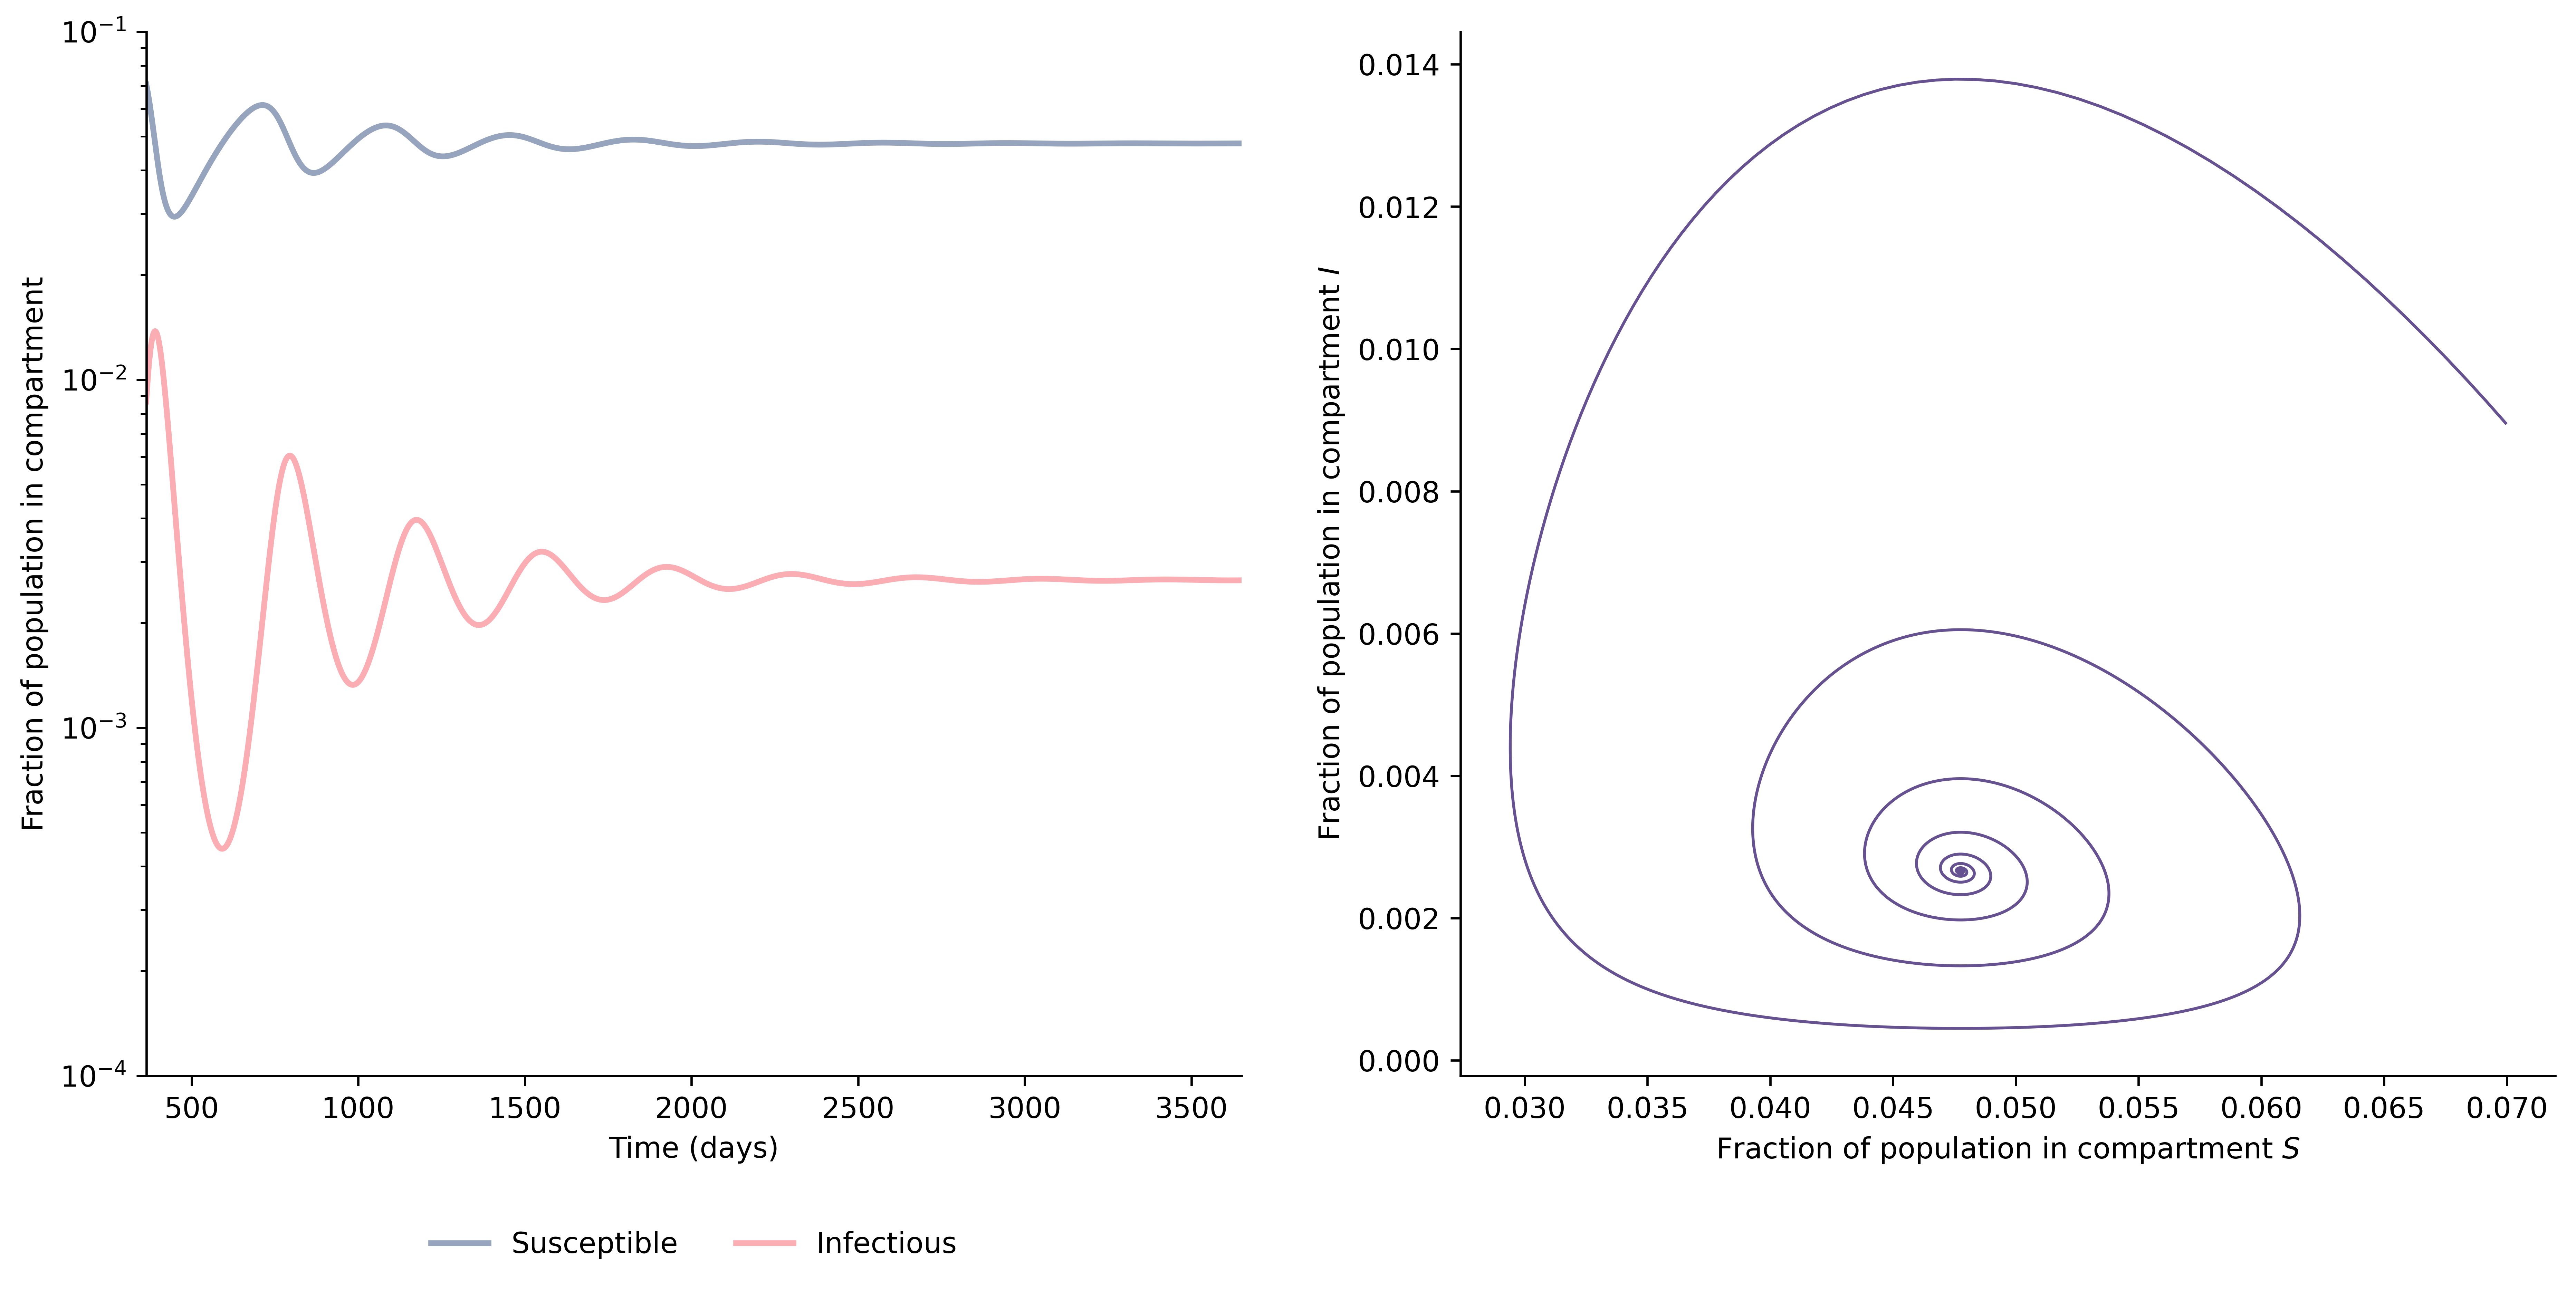

In [446]:
fig, (ax1, ax2) = plt.subplots(1, 2, facecolor="w", figsize=(15, 8), dpi=600)

ax1.plot(np.vstack(res)[:,0], color=COLORS["S"], alpha=0.5, lw=2, label="Susceptible")
ax1.plot(np.vstack(res)[:,1], color=COLORS["I"], alpha=0.5, lw=2, label="Infectious")

ax1.set_xlabel('Time (days)')
ax1.set_ylabel("Fraction of population in compartment")
ax1.grid(b=True, which='major', c='w', lw=2, ls='-')

for spine in ("top", "right"):
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

ax1.set_xlim(365, 3650)
ax1.set_ylim(0.0001, 0.1)

legend = ax1.legend()
legend.get_frame().set_alpha(0.5)

fig.subplots_adjust(bottom=0.25)
ax1.legend(title='', bbox_to_anchor=(0.5, -0.2), loc="lower center", ncol=3, frameon=False)

ax1.set_yscale("log")

ax2.plot(np.vstack(res)[365:, 0], np.vstack(res)[365:, 1], c=COLORS["X"], lw=1)
ax2.set_xlabel("Fraction of population in compartment $S$")
ax2.set_ylabel("Fraction of population in compartment $I$")


plt.savefig("vaccination_waning_integral.pdf")
plt.show()